# Evolution of the Quarterback Position in American Football  

<div style="text-align:center;">
    <img src="https://upload.wikimedia.org/wikipedia/commons/thumb/c/c5/AmFBfield.svg/2560px-AmFBfield.svg.png" alt="Football Field" width="1000">
</div>  

### Overview – National Football League & Quarterbacks  

The National Football League (NFL) is the highest level of professional American football and one of the most culturally significant sports organizations in the United States. From September to February, it dominates television ratings and provides entertainment for millions. The NFL is a multi-billion dollar industry, generating substantial revenue not only through ticket sales and merchandise but also through broadcasting rights, tourism, and related businesses.  

Football teams play a major role in the identity and economy of their cities, creating jobs for athletes, coaches, trainers, media staff, and countless others in hospitality, advertising, and tourism. Community outreach programs like NFL Play-60 demonstrate the league’s commitment to promoting health and engagement among youth.  

Within this ecosystem, the quarterback is widely regarded as the most important position on the field. Often referred to as the “field general,” the quarterback directs the offense, reads the defense, adjusts plays, and makes split-second decisions that can determine the outcome of a game. With the ball in hand, they can pass, hand off, or run—every offensive play starts with them. Their leadership, decision-making, and execution make them the face of franchises and the key factor in a team’s success.  

### Why Studying the Quarterback Position Matters  

Quarterbacks influence not only individual games but also long-term team strategy. Their performance shapes offensive schemes, play-calling tendencies, and even how defenses are designed to counter them. Studying the evolution of the position reveals broader changes in the game—such as shifts in passing versus rushing emphasis, changes in athletic profiles, and advances in play design.  

From a data-driven perspective, analyzing quarterback trends can highlight the traits most likely to succeed in today’s NFL and inform strategies for drafting, training, and game planning.  

### How Data Science Will Be Used to Analyze Quarterbacks  

This analysis applies the **Data Science Lifecycle** to examine the history and development of NFL quarterbacks:  

1. **Data Collection** – Gathering historical NFL quarterback statistics, game logs, and situational data from trusted sports databases.  
2. **Data Processing** – Cleaning, normalizing, and formatting datasets for consistency across eras.  
3. **Exploratory Analysis & Visualization** – Using charts, trends, and statistical summaries to identify performance shifts over decades.  
4. **Modeling & Hypothesis Testing** – Applying statistical tests and machine learning techniques to measure the impact of different quarterback attributes on game outcomes.  
5. **Interpretation & Insight** – Translating results into actionable insights for coaches, analysts, and football historians.  

#### Tools & Libraries Used  
- Python  
- Pandas  
- NumPy  
- BeautifulSoup  
- Scikit-learn  
- Seaborn  
- Matplotlib  
- Requests  

### Data Collection

We will use offensive and defensive season and game log statistics from [Pro Football Reference](https://www.pro-football-reference.com/), a comprehensive database of NFL player and team stats. Our focus will be on **passing data for NFL quarterbacks** from **1932 to 2022**. While the NFL began earlier, passing and rushing statistics were not officially tracked until 1932.  

We will collect both yearly and career-level quarterback stats, including:  

- **Passing Yards** – Total yards thrown in a season, including yards gained after the catch.  
- **Passing Touchdowns** – Passes caught in the end zone resulting in a score.  
- **Passing Touchdown %** – Percentage of passes that result in touchdowns.  
- **Completion Percentage** – (Completed passes ÷ total attempts) × 100.  
- **Attempts** – Total pass attempts.  
- **Interceptions** – Passes caught by the opposing team, resulting in a turnover.  
- **Interception %** – Percentage of passes that are intercepted.  
- **Average Yards per Attempt** – Average yards gained per pass attempt.  
- **Average Yards per Game** – Average passing yards per game.  
- **Sacks** – Times the quarterback is tackled before releasing the ball.  
- **Sack %** – (Sacks ÷ pass attempts) × 100.  
- **Net Yards per Pass Attempt** – Adjusts yards per attempt to account for sacks.  
- **Adjusted Net Yards per Attempt** – Further adjusts for touchdowns and interceptions.  
- **Passer Rating** – Composite metric evaluating overall quarterback performance.  
- **Fourth Quarter Comebacks** – Wins led in the final 15 minutes of play.  
- **Game-Winning Drives** – Wins secured on the team’s final possession.  
- **Rushing Yards** – Yards gained by the quarterback running the ball.  
- **Rushing Touchdowns** – Touchdowns scored by the quarterback on the ground.  

Next, before scraping data, we will import the Python libraries and packages needed for this tutorial.


In [1]:
# Necessary for Data Collection
from selenium import webdriver
from selenium.webdriver.chrome.options import Options
from selenium.webdriver.common.by import By
from selenium.common.exceptions import NoSuchElementException
from selenium.common.exceptions import ElementClickInterceptedException
from bs4 import BeautifulSoup
from io import StringIO
import time

# Necessary for Data Collection & Processing
import pandas as pd
import numpy as np

# Necesscary for Exploratory Analysis and Data Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Necessary for Model: Analysis, Hypothesis Testing, and ML
import statsmodels.formula.api as sm 
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestClassifier


#### Extract Quarterback statistics, by Year (1932 - 2022)
First, we use Selenium, BeautifulSoup, and Pandas to read data from Pro Football Reference and store the necessary tabular data in a DataFrame object. We first start at the year 1932, extract and store the data, then automatically click the "Next Season" button until we've reached the most recent season, the 2022 season. Here, we're extracting statistics (like some of the ones mentioned) that'll help determine quarterback performance over time.

The comments in the code below explain step by step what the code is doing. I will provide a brief overview here. For each year (1932 to 2022), a webpage exists containing tabular data for every player that threw a pass for a certain year, and a webpage exists containing tabular data for every player that ran the ball for a certain year. We start at the webpage for 1932. After extracting and storing the passing data for a certain year in our DataFrame, we will click the "Next Season" button on the webpage, then repeat the data extraction steps for 1933. We do this for every next webpage until we get to the webpage representing the 2022 season. At this point, after extracting and storing the data for the 2022 season, there's no more seasons to extract data from, and so we stop. We will do the same for rushing statistics, starting at the webpage representing 1932 rushing statistics and extracting data all the way up to the 2022 season. Note that while scraping, some pop-ups may occur. The code below handles this edge case by closing pop-ups when they appear. We will store these passing and rushing statistics in two separate DataFrame objects called 'df_passing' and 'df_rushing', respectively.

#### IMPORTANT NOTE about Running Code:
Currently, the extraction process mentioned above takes approximately 7 minutes for passing and rushing statistics each. Thus, I have just demonstrated that the code works for a small subset of data, specifically from 2017 to 2022. Thus, in the example down below I start at 2017 instead of 1932.

If you want to extract data all the data (1932-2022), then follow the steps down below:
- STEP #1 -> Change... driver.get("https://www.pro-football-reference.com/years/2017/passing.htm")
             to... driver.get("https://www.pro-football-reference.com/years/1932/passing.htm")
    - Now we're extracting passing statistics from 1932 to present, which is the size of the full dataset we want
- STEP #2 -> Change... i = 2017 to... i = 1932
    - Here, we adjust the iterator to represent the desired start year, so break from the loop will occur after (2022 - 1932) iterations

In [2]:
# Create instance of a Chrome web driver
driver = webdriver.Chrome()

# Call 'get()' method to open a URL in the browser window
driver.get("https://www.pro-football-reference.com/years/2017/passing.htm")

# Try to extract the data
try:
    # Create an empty DataFrame to store the data
    df_passing = pd.DataFrame()

    # Initialize start year
    i = 2017

    # Loop through / Extract data for each NFL season
    while i != 2023:
        # Wait some time in order to properly load each page
        time.sleep(3)
        
        # Use Beautiful Soup to extract the data from the table
        soup = BeautifulSoup(driver.page_source, 'html.parser')
        # Find all HTML 'table' tags, we only want the first one (thus index 0)
        table = soup.find_all('table')[0]
        # Store the desired table's contents into a new DataFrame object
        temp_df = pd.read_html(StringIO(str(table)))[0]
        # Add a column called 'year' to the DataFrame
        temp_df['year'] = i
        
        # Concatenate the DataFrame for the current year to the preexisting DataFrame
        # that stores information for all the years (we're continuosly building 'df'
        # from scratch)
        df_passing = pd.concat([df_passing, temp_df], ignore_index=True)

        # Increment the current year by 1, break once we reached the most recent season
        i += 1
        if i == 2023:
            break

        # Find the 'Next Season' button on the current webpage, if it exists
        try:
            next_button = driver.find_element("link text", "Next Season")
            next_button.click()

        # If it doesn't exist in that we get a Pop-Up, close that Pop-Up and proceed 
        # to clicking 'Next Season'.
        except (NoSuchElementException, ElementClickInterceptedException):
            try:
                close_button = driver.find_element("class name", "closer")
                close_button.click()
                next_button = driver.find_element("link text", "Next Season")
                next_button.click()
            except NoSuchElementException:
                pass
    # Close the Web Driver once we're done extracting data from the current page
    driver.close()

    # View the final DataFrame
    df_passing.to_csv('nfl_passing_sample.csv', index=False)
except:
    # Close the Web Driver just in case any errors occur
    driver.close()
    raise

In [3]:
# Create instance of a Chrome web driver
driver = webdriver.Chrome()

# Call 'get()' method to open a URL in the browser window
driver.get("https://www.pro-football-reference.com/years/2017/rushing.htm")

# Try to extract the data
try:
    # Create an empty DataFrame to store the data
    df_rushing = pd.DataFrame()

    # Initialize start year
    i = 2017

    # Loop through / Extract data for each NFL season
    while i != 2023:
        # Wait some time in order to properly load each page
        time.sleep(3)
        
        # Use Beautiful Soup to extract the data from the table
        soup = BeautifulSoup(driver.page_source, 'html.parser')
        # Find all HTML 'table' tags, we only want the first one (thus index 0)
        table = soup.find_all('table')[0]
        # Store the desired table's contents into a new DataFrame object
        temp_df = pd.read_html(StringIO(str(table)))[0]
        # Add a column called 'year' to the DataFrame
        temp_df['year'] = i
        
        # Concatenate the DataFrame for the current year to the preexisting DataFrame
        # that stores information for all the years (we're continuosly building 'df'
        # from scratch)
        df_rushing = pd.concat([df_rushing, temp_df], ignore_index=True)

        # Increment the current year by 1, break once we reached the most recent season
        i += 1
        if i == 2023:
            break

        # Find the 'Next Season' button on the current webpage, if it exists
        try:
            next_button = driver.find_element("link text", "Next Season")
            next_button.click()

        # If it doesn't exist in that we get a Pop-Up, close that Pop-Up and proceed 
        # to clicking 'Next Season'.
        except (NoSuchElementException, ElementClickInterceptedException):
            try:
                close_button = driver.find_element("class name", "closer")
                close_button.click()
                next_button = driver.find_element("link text", "Next Season")
                next_button.click()
            except NoSuchElementException:
                pass
    # Close the Web Driver once we're done extracting data from the current page
    driver.close()

    df_rushing.to_csv('nfl_rushing_sample.csv', index=False)
except:
    # Close the Web Driver just in case any errors occur
    driver.close()
    raise

To showcase that the code above properly extracts and collects the data, I will print the resulting DataFrames ('df_passing' and 'df_rushing') down below.

In [4]:
df_passing

,Rk,Player,Age,Team,Pos,G,GS,QBrec,Cmp,Att,...,QBR,Sk,Yds.1,Sk%,NY/A,ANY/A,4QC,GWD,Awards,year
0,1,Tom Brady,40,NWE,QB,16,16,13-3-0,385,581,...,71.1,35,201,5.68,7.10,7.56,2,2,"PB,AP-1,AP MVP-1,AP OPoY-3",2017
1,2,Philip Rivers,36,LAC,QB,16,16,9-7-0,360,575,...,61.3,18,120,3.04,7.41,7.60,2,2,PB,2017
2,3,Matthew Stafford,29,DET,QB,16,16,9-7-0,371,565,...,65.3,47,287,7.68,6.80,7.01,1,4,NaN,2017
3,4,Drew Brees,38,NOR,QB,16,16,11-5-0,386,536,...,63.1,20,145,3.60,7.53,7.71,2,2,PB,2017
4,5,Ben Roethlisberger,35,PIT,QB,15,15,12-3-0,360,561,...,67.2,21,139,3.61,7.07,6.95,3,4,PB,2017
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
686,110,Nate Sudfeld,29,DET,QB,2,0,NaN,0,0,...,0.7,1,7,100.00,-7.00,-7.00,0,0,NaN,2022
687,111,Tommy Townsend,26,KAN,P,17,0,NaN,0,1,...,NaN,0,0,0.00,0.00,0.00,0,0,"PB,AP-1",2022
688,112,Cedrick Wilson Jr.,27,MIA,WR,15,0,NaN,0,0,...,0.2,1,6,100.00,-6.00,-6.00,0,0,NaN,2022
689,113,Garrett Wilson,22,NYJ,WR,17,12,NaN,0,1,...,0.8,0,0,0.00,0.00,0.00,0,0,AP ORoY-1,2022


In [5]:
df_rushing

Unnamed: 0_level_0 Unnamed: 1_level_0 Unnamed: 2_level_0  \
                     Rk             Player                Age   
0                     1       Le'Veon Bell                 25   
1                     2       LeSean McCoy                 29   
2                     3      Melvin Gordon                 24   
3                     4        Todd Gurley                 23   
4                     5      Jordan Howard                 23   
...                 ...                ...                ...   
4118                601       Robert Woods                 30   
4119                602       Brock Wright                 24   
4120                603       Dareke Young                 23   
4121                604      Shane Zylstra                 26   
4122                NaN     League Average                NaN   

     Unnamed: 3_level_0 Unnamed: 4_level_0 Unnamed: 5_level_0  \
                   Team                Pos                  G   
0                   PIT                 RB                 15   
1                   BUF                 RB                 16   
2                   LAC                 RB                 16   
3                   LAR                 RB                 15   
4                   CHI                 RB                 16   
...                 ...                ...                ...   
4118                TEN                 WR                 17   
4119                DET                 TE                 17   
4120                SEA                 WR                 13   
4121                DET                 TE                 13   
4122                NaN                NaN                NaN   

     Unnamed: 6_level_0 Rushing                                              \
                     GS     Att   Yds   TD   1D Succ%  Lng  Y/A   Y/G   A/G   
0                    15     321  1291    9   71  45.5   27  4.0  86.1  21.4   
1                    16     287  1138    6   57  42.2   48  4.0  71.1  17.9   
2                    16     284  1105    8   61  39.8   87  3.9  69.1  17.8   
3                    15     279  1305   13   69  50.5   57  4.7  87.0  18.6   
4                    16     276  1122    9   65  42.4   53  4.1  70.1  17.3   
...                 ...     ...   ...  ...  ...   ...  ...  ...   ...   ...   
4118                 15       0     0    0    0   NaN  NaN  NaN   0.0   0.0   
4119                 10       0     0    0    0   NaN  NaN  NaN   0.0   0.0   
4120                  0       0     0    0    0   NaN  NaN  NaN   0.0   0.0   
4121                  2       0     0    0    0   NaN  NaN  NaN   0.0   0.0   
4122                NaN     NaN   NaN  NaN  NaN  49.7  NaN  4.5   9.4   2.1   

     Unnamed: 16_level_0                   Unnamed: 17_level_0  year  
                     Fmb                                Awards        
0                      3                               PB,AP-1  2017  
1                      3                                    PB  2017  
2                      1                                   NaN  2017  
3                      5  PB,AP-1,AP MVP-2,AP OPoY-1,AP CPoY-6  2017  
4                      1                                   NaN  2017  
...                  ...                                   ...   ...  
4118                   1                                   NaN  2022  
4119                   0                                   NaN  2022  
4120                   0                                   NaN  2022  
4121                   0                                   NaN  2022  
4122                 NaN                                   NaN  2022  

[4123 rows x 19 columns]

### Data Processing
Now we need to clean up our data and tables. Some of the tasks we need to do to clean up our data include:
- Filtering out non-quarterback positions
- Removing certain characters from data entries in certain columns
- Split certain column(s) into multiple columns
- Deal with Null Values 

We’ve created **five distinct DataFrames** for our analysis:
- **`df_passing`** — Yearly quarterback passing statistics (1932–2022)  
- **`df_rushing`** — Yearly quarterback rushing statistics (1932–2022)  
- **`df_players`** — Career quarterback passing statistics (1932–2022)  
- **`df_players1`** — Career quarterback rushing statistics (1932–2022)  
- **`players`** — Combined career quarterback passing & rushing statistics (1932–2022)  
  - **Note:** Rushing statistics are only included for quarterbacks who are also top passers (typically starting QBs). The definition of “top passer” is less clear for the 1930s and 1940s, when the quarterback role was less defined. As a result, some players from that era may have missing rushing statistics.
 

For speeding up the data collection step, below we have just read in the CSVs that we created above. It contains all data from 1932 to 2022. 

In [54]:
# Read in the CSVs that were created above
df_passing = pd.read_csv('nfl_passing.csv')
df_rushing = pd.read_csv('nfl_rushing.csv', header=1)
df_passing

,Rk,Player,Tm,Age,Pos,G,GS,QBrec,Cmp,Att,...,Sk,Yds.1,Sk%,NY/A,ANY/A,4QC,GWD,year,1D,QBR
0,1,Arnie Herber+,GNB,22,TB,14,8,NaN,37,101,...,NaN,NaN,NaN,NaN,NaN,0,0,1932,NaN,NaN
1,2,Walt Holmer,CRD,30,NaN,10,4,NaN,25,78,...,NaN,NaN,NaN,NaN,NaN,0,0,1932,NaN,NaN
2,3,Jack McBride,2TM,31,TB,12,6,NaN,36,74,...,NaN,NaN,NaN,NaN,NaN,0,0,1932,NaN,NaN
3,4,Keith Molesworth,CHI,27,QB,14,14,NaN,25,64,...,NaN,NaN,NaN,NaN,NaN,0,0,1932,NaN,NaN
4,5,Benny Friedman,BKN,27,TB,11,10,NaN,23,74,...,NaN,NaN,NaN,NaN,NaN,0,0,1932,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7841,102,Christian Kirk,JAX,26,WR,17,17,NaN,0,1,...,0,0,0.0,0.00,0.00,NaN,NaN,2022,0,9.9
7842,103,Cooper Kupp,LAR,29,WR,9,9,NaN,0,1,...,0,0,0.0,0.00,0.00,NaN,NaN,2022,0,3.0
7843,104,James Proche,BAL,26,WR,15,0,NaN,0,1,...,0,0,0.0,0.00,-45.00,NaN,NaN,2022,0,0.0
7844,105,Tommy Townsend*+,KAN,26,P,17,0,NaN,0,1,...,0,0,0.0,0.00,0.00,NaN,NaN,2022,0,NaN


Next up, we'll do some data cleaning. This includes dropping some unnecessary columns along with renaming columns.

In [55]:
# Drop unnecessary statistics for quarterbacks
del df_rushing['GS']
del df_rushing['Fmb']
del df_rushing['Fmb.1']

# Rename column(s):
df_passing = df_passing.rename(columns={'Yds.1': 'Yds_Sk'})
df_rushing = df_rushing.rename(columns={'Unnamed: 14':'year', 'Att':'Rush_Att', 'Yds':'Rush_Yds', 'TD':'Rush_TD', '1D':'Rush_1D', 'Lng':'Rush_Lng',
                                        'Y/A':'Rush_Y/A', 'Y/G':'Rush_Y/G'})

Prior to 1950, the quarterback position was less refined as it is today. Back then, other positions like the Tail Back would throw the ball. Here, we will acknowledge these other positions and still count them as quarterback like. Now, we want to filter out all players from 1932 to 2022 that passed and ran with the ball, but are NOT quarterback positions. 

In [56]:
# Only identify players that actually played positions that pass the ball for AFTER 1950 inclusive (Quarterback and Tailback)
# by using Boolean Indexing
# Note -> Tailbacks early on (1930s, 1940s) regularly acted as the "Quarterback"
filter1 = df_passing['Pos'] == 'QB'
filter2 = df_passing['Pos'] == 'TB'
filter3 = df_passing['year'] >= 1950
filter4 = df_passing['year'] < 1950
filter5 = filter3 & (filter1 | filter2)

filter6 = df_rushing['Pos'] == 'QB'
filter7 = df_rushing['Pos'] == 'TB'
filter8 = df_rushing['year'] >= 1950
filter9 = df_rushing['year'] < 1950
filter10 = filter8 & (filter6 | filter7)

# Create a new DataFrames for Passing statistics and Rushing statistics
df_passing = df_passing[filter4 | filter5].reset_index(drop=True)
df_rushing = df_rushing[filter9 | filter10].reset_index(drop=True)


Let's do some more data cleaning. Let's replace 'NaN' values with zero, as most of our column data is quantitative and thus having zero representing null values makes sense. This also makes computations feasible later on. When we collected the data, rows that represent that table column names were also copied over, so lets delete them as well. Note we're making these changes to both 'df_passing' and 'df_rushing'.

In [57]:
# Deal with 'NaN' values:
df_passing.fillna(0, inplace=True)
df_rushing.fillna(0, inplace=True)

# Drop Header rows that were accidentally copied over
df_passing = df_passing.drop(df_passing[df_passing['Rk'] == 'Rk'].index)
df_rushing = df_rushing.drop(df_rushing[df_rushing['Rk'] == 'Rk'].index)

Now we might want to able to look at quarterback wins and losses over time and see what statistics impact winning. We cannot do this very efficiently if that data is stored as a string and formatted as 'wins-losses-ties'. Thus, we want to split the 'QBrec' column and make it into three separate columns representing wins, losses, and ties. Now, we want to drop the original column 'QBrec'.

In [58]:
# Split the 'QBrec' column based on '-'
df_passing[['Wins', 'Losses', 'Ties']] = df_passing['QBrec'].str.split('-', expand=True)
# Drop the original 'QBrec' column
df_passing.drop('QBrec', axis=1, inplace=True)

Quarterbacks may also receive awards like invitations to the Pro-Bowl (a celebratory game that all the leagues best players participate in) along with being an All-Pro (an award recognizing best players for a certain year). However, Pro-Bowl and All-Pro awardees have an '*' and '+' next to their names. These characters aren't included in the players names. Thus, we need to remove these characters from the 'Player' column and create new columns 'Pro-Bowl' and 'All-Pro' that are booleans, representing whether a player received the award or not.

In [59]:
# Include Pro-Bowl / All-Pro Information
df_passing['All-Pro'] = df_passing['Player'].apply(lambda x: True if '+' in str(x) else False)
df_passing['Pro-Bowl'] = df_passing['Player'].apply(lambda x: True if '*' in str(x) else False)
df_rushing['All-Pro'] = df_rushing['Player'].apply(lambda x: True if '+' in str(x) else False)
df_rushing['Pro-Bowl'] = df_rushing['Player'].apply(lambda x: True if '*' in str(x) else False)

# Remove Characters from certain columns
# Iterate through the rows and edit the 'Player' column
for index, row in df_passing.iterrows():
    player = row['Player']

    player = player.replace('+', '')  # remove the +, 
    player = player.replace('*', '')  # remove the *, 

    player = player.strip()  # remove leading/trailing spaces
    df_passing.at[index, 'Player'] = player  # update the DataFrame

for index, row in df_rushing.iterrows():
    player = row['Player']

    player = player.replace('+', '')  # remove the +, 
    player = player.replace('*', '')  # remove the *, 

    player = player.strip()  # remove leading/trailing spaces
    df_rushing.at[index, 'Player'] = player  # update the DataFrame

Additionally, we're not interested in players that have played for two teams during a single season, as that could skew their statistics. Thus, we will drop rows that fit this criterion.

In [60]:
# Drop all rows where col2 has value '2TM'
df_passing = df_passing.drop(df_passing[df_passing['Tm'] == '2TM'].index).reset_index(drop=True)
df_rushing = df_rushing.drop(df_rushing[df_rushing['Tm'] == '2TM'].index).reset_index(drop=True)
# Now, we have quarterbacks that have played for a single team in a year. We don't care about what team specifically, so we'll drop these columns
del df_passing['Tm']
del df_rushing['Tm']

In order to eventually group the data and perform necessary calculations, we're going to need the change the data types of all the columns in 'df_passing' and 'df_rushing'. Let's do that.

In [61]:
# Change the data type of ALL the columns in the DataFrames
df_passing = df_passing.astype({
    'Rk': int,
    'Player': str,
    'Age': int,
    'Pos': str,
    'G': int,
    'GS': int,
    'Cmp': int,
    'Att': int,
    'Cmp%': np.float64,
    'Yds': int,
    'TD': int,
    'TD%': np.float64,
    'Int': int,
    'Int%': np.float64,
    '1D': int,
    'Lng': int,
    'Y/A': np.float64,
    'AY/A': np.float64,
    'Y/C': np.float64,
    'Y/G': np.float64,
    'Rate': np.float64,
    'QBR': np.float64,
    'Sk': int,
    'Sk%': np.float64,
    'Yds_Sk': int,
    'NY/A': np.float64,
    'ANY/A': np.float64,
    '4QC': int,
    'GWD': int
})

df_rushing = df_rushing.astype({
    'Rk': int,
    'Player': str,
    'Age': int,
    'Pos': str,
    'G': int,
    'Rush_Att': int,
    'Rush_Yds': int,
    'Rush_TD': int,
    'Rush_1D': int,
    'Rush_Lng': int,
    'Rush_Y/A': np.float64,
    'Rush_Y/G': np.float64,
    'year': int
})

Now, we want to scale the number of quarterbacks per year properly. Even though the NFL is popular now, the league wasn't always so. While now there are 32 NFL teams, there were only roughly 8-10 teams in the 1930s. We want to extract only starting quarterbacks data. So, we'll only include the top n rows (quarterbacks) for each year, where n represents the number of teams in the league for that given year. The dictionary 'year_dict' stores this information.

In [62]:
year_dict = {1932: 8, 
            1933: 10,
            1934: 11,
            1935: 9,
            1936: 9,
            1936: 10,
            1937: 10,
            1938: 10,
            1939: 10,
            1940: 10,
            1941: 10,
            1942: 10,
            1943: 10,
            1944: 10,
            1945: 10,
            1946: 10,
            1947: 10,
            1948: 10,
            1949: 10,
            1950: 13,
            1951: 12,
            1952: 12,
            1953: 12,
            1954: 12,
            1955: 12,
            1956: 12,
            1957: 12,
            1958: 12,
            1959: 12,
            1960: 13,
            1961: 14,
            1962: 14,
            1963: 14,
            1964: 14,
            1965: 14,
            1966: 15,
            1967: 16,
            1968: 16,
            1969: 16,
            1970: 26,
            1971: 26,
            1972: 26,
            1973: 26,
            1974: 26,
            1975: 26,
            1976: 28,
            1977: 28,
            1978: 28,
            1979: 28,
            1980: 28,
            1981: 28,
            1982: 28,
            1983: 28,
            1984: 28,
            1985: 28,
            1986: 28,
            1987: 28,
            1988: 28,
            1989: 28,
            1990: 28,
            1991: 28,
            1992: 28,
            1993: 28,
            1994: 28,
            1995: 30,
            1996: 30,
            1997: 30,
            1998: 30,
            1999: 31,
            2000: 31,
            2001: 31,
            2002: 32,
            2003: 32,
            2004: 32,
            2005: 32,
            2006: 32,
            2007: 32,
            2008: 32,
            2009: 32,
            2010: 32,
            2011: 32,
            2012: 32,
            2013: 32,
            2014: 32,
            2015: 32,
            2016: 32,
            2017: 32,
            2018: 32,
            2019: 32,
            2020: 32,
            2021: 32,
            2022: 32}

# Only Keep a Certain amount of Quarterbacks per year
def rows_kept(group):
    return group.head(year_dict[group.name])

df_passing = df_passing.groupby('year', group_keys=False).apply(rows_kept)

C:\Users\derek\AppData\Local\Temp\ipykernel_32036\1479707873.py:98: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df_passing = df_passing.groupby('year', group_keys=False).apply(rows_kept)


In order to better understand longevity of a player, along with how their career statistics match up against other quarterbacks, let's create a new DataFrame that groups the quarterbacks by name and extracts their start year and end year. Then merge this dataframe ('df_players') with 'df_passing'.

In [63]:
# Instantiate Player DataFrames            
df_players = df_passing.groupby('Player')['year'].agg(['min', 'max']).reset_index()

# Merge DataFrames to add min/max year columns to original DataFrames
df_passing = pd.merge(df_passing, df_players, how='left', on='Player')

Now, we want to scale down 'df_rushing' to only include starting quarterbacks, meaning we need 'df_rushing' to have rows with the same 'Player'-'year' pair as in 'df_passing'. This ensures that we have rushing statistics as well for all the quarterbacks we have passing statistics for.

In [64]:
df_r = df_rushing[['Player', 'year', 'Rush_Yds', 'Rush_Att', 'Rush_TD', 'Rush_Lng', 'Rush_Y/A', 'Rush_Y/G']]
df_rushing = pd.merge(df_passing, df_r, how='inner', on=['Player', 'year'])

Currently, we only have the player name, and their start and end year in 'df_players'. We want to include their career statistics as well. This will using groupby's 'agg' method, in order to specify how we want to aggregate/calculate certain statistical values (i.e., sum, count, max, etc.) We'll first add columns using 'agg', then add more columns based on values of preexisting columns along with the formulas used to calculate the statistics originally. We also want to group rushing statistics as well, so we'll create a new rushing DataFrame 'df_players2' to do this.

Note that how passer rating is calculate is not intuitive or obvious to new or even longtime football fans. The passer rating formula seen here was gotten from this [Wikipedia](https://en.wikipedia.org/wiki/Passer_rating) link. This link details the history of passer rating, the formula used, and the reasoning behind the formula. If you're confused, I suggest giving it a read.

In [65]:
# Calculate grouped column values
df_players = df_passing.groupby('Player').agg({'Rk': 'count', 'GS': 'sum', 'Cmp': 'sum', 'Yds': 'sum', 'Att': 'sum', 'TD': 'sum', 'Int': 'sum', 'Lng': 'max', 'Sk': 'sum', 'Yds_Sk': 'sum', '4QC': 'sum', 
                                               'GWD':'sum', 'year': 'min'})
df_players['Cmp%'] = df_players['Cmp'] / df_players['Att']
df_players['TD%'] = df_players['TD'] / df_players['Att']
df_players['Int%'] = df_players['Int'] / df_players['Att']
df_players['Y/A'] = df_players['Yds'] / df_players['Att']
df_players['AY/A'] = (df_players['Yds'] + 20*df_players['TD'] - 45*df_players['Int']) / df_players['Att']   
df_players['Y/C'] = df_players['Yds'] / df_players['Cmp']
df_players['Y/G'] = df_players['Yds'] / df_players['GS']
df_players['Sk%'] = df_players['Sk'] / (df_players['Sk'] + df_players['Att'])
df_players['NY/A'] = df_players['Sk'] / (df_players['Att'] + df_players['Sk'])
df_players['ANY/A'] = (df_players['Yds'] - df_players['Yds_Sk'] + ((20*df_players['TD']) - (45*df_players['Int']))) / (df_players['Att'] + df_players['Sk'])

# Passer Rating Formula
a = ((df_players['Cmp'] / df_players['Att']) - 0.3)*5
b = ((df_players['Yds'] / df_players['Att']) - 3)*0.25
c = (df_players['TD'] / df_players['Att'])*20
d = 2.375 - ((df_players['Int'] / df_players['Att'])*25)
df_players['Rate'] = ((a + b + c + d)/6)*100

df_players2 = df_rushing.groupby('Player').agg({'Rk': 'count', 'G': 'sum', 'Rush_Yds': 'sum', 'Rush_Att': 'sum', 'Rush_TD': 'sum', 'Rush_Lng': 'max', 'year': 'min'})
df_players2['Rush_Y/A'] = df_players2['Rush_Yds'] / df_players2['Rush_Att']
df_players2['Rush_Y/G'] = df_players2['Rush_Yds'] / df_players2['G']

We also may want to aggregate columns for boolean values, specifically where we get True entries. This applies to the 'Pro-Bowl' and 'All-Pro' columns. Suppose we want to see how many of these awards each a player has received over their career. To do this, we'll create new dataframes ('true_probowl' and 'true_allpro') where we only contain rows that have True values for 'Pro-Bowl' and 'All-Pro', respectively. We'll then merge these dataframes with the original dataframe 'df_players'. 

In [66]:
# Create Pro-Bowl DataFrame
true_probowl = df_passing[df_passing['Pro-Bowl']]
#true_probowl = true_probowl.sort_values(by='Player')
true_probowl = true_probowl.groupby('Player').agg({'Pro-Bowl': 'count'})

# Create All-Pro DataFrame
true_allpro = df_passing[df_passing['All-Pro']]
#true_allpro = true_allpro.sort_values(by='Player')
true_allpro = true_allpro.groupby('Player').agg({'All-Pro': 'count'})

# Merge these DataFrames with the original Passing Players DataFrame
df_players = pd.merge(df_players, true_probowl, how='left', on='Player')
df_players = pd.merge(df_players, true_allpro, how='left', on='Player')

Proceed to clean up the 'NaN' values in the 'Pro-Bowl' and 'All-Pro' columns (as we now know which players do and do not have awards) and change their types to int since now we know the counts. We also want to round our float columns to two decimal places for a cleaner display

In [67]:
# Clean-Up Passing_Players NaN and Decimal entries
df_players['Pro-Bowl'] = df_players['Pro-Bowl'].fillna(0)
df_players['All-Pro'] = df_players['All-Pro'].fillna(0)
df_players['Cmp%'] = df_players['Cmp%'].round(2)
df_players['TD%'] = df_players['TD%'].round(2)
df_players['Int%'] = df_players['Int%'].round(2)
df_players['Y/A'] = df_players['Y/A'].round(2)
df_players['AY/A'] = df_players['AY/A'].round(2)
df_players['Y/C'] = df_players['Y/C'].round(2)
df_players['Y/G'] = df_players['Y/G'].round(2)
df_players['Rate'] = df_players['Rate'].round(2)
df_players['Sk%'] = df_players['Sk%'].round(2)
df_players['NY/A'] = df_players['NY/A'].round(2)
df_players['ANY/A'] = df_players['ANY/A'].round(2)

# Change type of newly added columns
df_players = df_players.astype({
    'Pro-Bowl': int,
    'All-Pro': int})

Let's sort our two career statistics dataframes ('df_players' and 'df_players2') by year as that we'll present a fuller display of our data later.

In [68]:
# Sort Quarterbacks by Year
df_players = df_players.sort_values(by='year')
df_players2 = df_players2.sort_values(by='year', ascending=False)

Merge 'df_players' and 'df_players2' so we have career statistics for rushing and passing all in one dataframe. Let's call this dataframe 'players'. When merging, we have some naming conflicts as some columns have the same name, so we'll have to drop some columns. Let's ensure there are no NaN values upon merging by filling them in with zeros just in case, along with 'np.inf' with the mean for that column. Additionally, lets change some column data types that we haven't changed yet to ensure any future calculations work without error. Do some rounding and renaming as well to clean up further. Let's also reorder the columns in a more reader friendly order

In [69]:
# Merge Passing and Rushing statistics for Quarterbacks
players = pd.merge(df_players, df_players2, how='left', on='Player')

del players['Rk_y']
del players['year_y']

players.fillna(0, inplace=True)
df_passing.fillna(0, inplace=True)
players.replace([np.inf, -np.inf], np.nan, inplace=True)
players.fillna(players.mean(), inplace=True)

players = players.astype({
    'Rush_Yds': int,
    'Rush_Att': int,
    'Rush_TD': int,
    'Rush_Lng': int,
})

players['Rush_Y/A'] = players['Rush_Y/A'].round(2)
players['Rush_Y/G'] = players['Rush_Y/G'].round(2)

players = players.rename(columns={'Rk_x': 'Rk', 'year_x':'year'})

columns = ['Rk', 'year', 'G', 'GS', 'Cmp', 'Cmp%', 'Att', 'Yds', 'TD', 'TD%', 'Int', 'Int%', 'Lng', 'Sk', 'Sk%', 'Yds_Sk',
       '4QC', 'GWD', 'Y/A', 'AY/A', 'Y/C', 'Y/G', 'NY/A', 'ANY/A', 'Rate', 'Pro-Bowl', 'All-Pro', 'Rush_Yds', 'Rush_Att', 'Rush_TD', 'Rush_Lng', 'Rush_Y/A', 'Rush_Y/G']

players = players[columns]

Now, we have all of our datasets. Let's display their output. Remember:
- df_passing -> Passing Statistics for EACH Player-Year pair
- df_rushing -> Rushing Statistics for EACH Player-Year pair
- df_players -> Career Passing Statistics for EACH Player
- df_players2 -> Career Rushing Statistics for EACH Player
- players -> Career Passing & Rushing Statistics for EACH Player

In [70]:
df_passing

,Rk,Player,Age,Pos,G,GS,Cmp,Att,Cmp%,Yds,...,year,1D,QBR,Wins,Losses,Ties,All-Pro,Pro-Bowl,min,max
0,1,Arnie Herber,22,TB,14,8,37,101,36.6,639,...,1932,0,0.0,0,0,0,True,False,1932,1945
1,2,Walt Holmer,30,0,10,4,25,78,32.1,449,...,1932,0,0.0,0,0,0,False,False,1932,1932
2,4,Keith Molesworth,27,QB,14,14,25,64,39.1,346,...,1932,0,0.0,0,0,0,False,False,1932,1935
3,5,Benny Friedman,27,TB,11,10,23,74,31.1,319,...,1932,0,0.0,0,0,0,False,False,1932,1933
4,6,Dutch Clark,26,TB,11,9,17,52,32.7,272,...,1932,0,0.0,0,0,0,True,False,1932,1936
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2013,28,Marcus Mariota,29,QB,13,13,184,300,61.3,2219,...,2022,111,55.6,5,8,0,False,False,2015,2022
2014,30,Matthew Stafford,34,QB,9,9,206,303,68.0,2087,...,2022,105,50.3,3,6,0,False,False,2009,2022
2015,31,Taylor Heinicke,29,QB,9,9,161,259,62.2,1859,...,2022,93,44.4,5,3,1,False,False,2021,2022
2016,32,Carson Wentz,30,QB,8,7,172,276,62.3,1755,...,2022,85,32.9,2,5,0,False,False,2016,2022


In [71]:
df_rushing

,Rk,Player,Age,Pos,G,GS,Cmp,Att,Cmp%,Yds,...,All-Pro,Pro-Bowl,min,max,Rush_Yds,Rush_Att,Rush_TD,Rush_Lng,Rush_Y/A,Rush_Y/G
0,1,Arnie Herber,22,TB,14,8,37,101,36.6,639,...,True,False,1932,1945,149,64,1,0,2.3,10.6
1,2,Walt Holmer,30,0,10,4,25,78,32.1,449,...,False,False,1932,1932,230,65,1,0,3.5,23.0
2,4,Keith Molesworth,27,QB,14,14,25,64,39.1,346,...,False,False,1932,1935,213,65,2,0,3.3,15.2
3,5,Benny Friedman,27,TB,11,10,23,74,31.1,319,...,False,False,1932,1933,250,88,0,0,2.8,22.7
4,6,Dutch Clark,26,TB,11,9,17,52,32.7,272,...,True,False,1932,1936,461,137,3,0,3.4,41.9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2013,28,Marcus Mariota,29,QB,13,13,184,300,61.3,2219,...,False,False,2015,2022,438,85,4,30,5.2,33.7
2014,30,Matthew Stafford,34,QB,9,9,206,303,68.0,2087,...,False,False,2009,2022,9,13,1,4,0.7,1.0
2015,31,Taylor Heinicke,29,QB,9,9,161,259,62.2,1859,...,False,False,2021,2022,96,28,1,15,3.4,10.7
2016,32,Carson Wentz,30,QB,8,7,172,276,62.3,1755,...,False,False,2016,2022,86,22,1,18,3.9,10.8


In [72]:
df_players

,Rk,GS,Cmp,Yds,Att,TD,Int,Lng,Sk,Yds_Sk,...,Y/A,AY/A,Y/C,Y/G,Sk%,NY/A,ANY/A,Rate,Pro-Bowl,All-Pro
Player,,,,,,,,,,,,,,,,,,,,,
Benny Friedman,2,15,65,913,154,10,17,0,0,0,...,5.93,2.26,14.05,60.87,0.00,0.00,2.26,37.61,0,0
John Doehring,1,0,10,203,26,2,1,0,0,0,...,7.81,7.62,20.30,inf,0.00,0.00,7.62,76.28,0,0
Walt Holmer,1,4,25,449,78,2,1,0,0,0,...,5.76,5.69,17.96,112.25,0.00,0.00,5.69,55.98,0,0
Arnie Herber,10,48,459,7705,1120,75,102,92,0,0,...,6.88,4.12,16.79,160.52,0.00,0.00,4.12,49.27,1,1
Keith Molesworth,4,30,70,1294,189,13,15,0,0,0,...,6.85,4.65,18.49,43.13,0.00,0.00,4.65,51.33,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Tua Tagovailoa,2,25,522,6201,788,41,18,84,41,315,...,7.87,7.88,11.88,248.04,0.05,0.05,7.11,97.90,0,0
Mac Jones,2,31,640,6798,963,36,24,75,62,472,...,7.06,6.69,10.62,219.29,0.06,0.06,5.82,88.96,1,0
Taylor Heinicke,2,24,482,5278,753,32,21,73,57,419,...,7.01,6.60,10.95,219.92,0.07,0.07,5.62,87.18,0,0


In [73]:
df_players2

,Rk,G,Rush_Yds,Rush_Att,Rush_TD,Rush_Lng,year,Rush_Y/A,Rush_Y/G
Player,,,,,,,,,
Kenny Pickett,1,13,237,55,3,23,2022,4.309091,18.230769
Trevor Lawrence,2,34,625,135,7,26,2021,4.629630,18.382353
Zach Wilson,2,22,287,57,5,52,2021,5.035088,13.045455
Davis Mills,2,28,152,50,2,17,2021,3.040000,5.428571
Justin Fields,2,27,1563,232,10,67,2021,6.737069,57.888889
...,...,...,...,...,...,...,...,...,...
Keith Molesworth,4,50,776,268,7,0,1932,2.895522,15.520000
Arnie Herber,10,108,117,244,2,1,1932,0.479508,1.083333
Walt Holmer,1,10,230,65,1,0,1932,3.538462,23.000000


In [74]:
players

,Rk,year,G,GS,Cmp,Cmp%,Att,Yds,TD,TD%,...,ANY/A,Rate,Pro-Bowl,All-Pro,Rush_Yds,Rush_Att,Rush_TD,Rush_Lng,Rush_Y/A,Rush_Y/G
Player,,,,,,,,,,,,,,,,,,,,,
Benny Friedman,2,1932,18,15,65,0.42,154,913,10,0.06,...,2.26,37.61,0,0,427,143,0,0,2.99,23.72
John Doehring,1,1932,7,0,10,0.38,26,203,2,0.08,...,7.62,76.28,0,0,28,36,1,0,0.78,4.00
Walt Holmer,1,1932,10,4,25,0.32,78,449,2,0.03,...,5.69,55.98,0,0,230,65,1,0,3.54,23.00
Arnie Herber,10,1932,108,48,459,0.41,1120,7705,75,0.07,...,4.12,49.27,1,1,117,244,2,1,0.48,1.08
Keith Molesworth,4,1932,50,30,70,0.37,189,1294,13,0.07,...,4.65,51.33,0,0,776,268,7,0,2.90,15.52
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Tua Tagovailoa,2,2021,26,25,522,0.66,788,6201,41,0.05,...,7.11,97.90,0,0,198,65,3,23,3.05,7.62
Mac Jones,2,2021,31,31,640,0.66,963,6798,36,0.04,...,5.82,88.96,1,0,231,91,1,15,2.54,7.45
Taylor Heinicke,2,2021,25,24,482,0.64,753,5278,32,0.04,...,5.62,87.18,0,0,409,88,2,38,4.65,16.36


For career data, we want to group quarterbacks according to their start year by decade. This'll help us get a better sense of how career statistics across time. To do this, we'll first create a dataframe with career statistics for each decade, then aggregate its columns to find average metrics, then concat the dataframes back together so we have a dataframe ('df_decade') that contains the average for each statistic for a certain decade. 

In [75]:
# Create DataFrames that group career data by Decade
df_1930s = players[(players['year'] > 1929) & (players['year'] <= 1939)]
df_1940s = players[(players['year'] > 1939) & (players['year'] <= 1949)]
df_1950s = players[(players['year'] > 1949) & (players['year'] <= 1959)]
df_1960s = players[(players['year'] > 1959) & (players['year'] <= 1969)]
df_1970s = players[(players['year'] > 1969) & (players['year'] <= 1979)]
df_1980s = players[(players['year'] > 1979) & (players['year'] <= 1989)]
df_1990s = players[(players['year'] > 1989) & (players['year'] <= 1999)]
df_2000s = players[(players['year'] > 1999) & (players['year'] <= 2009)]
df_2010s = players[(players['year'] > 2009) & (players['year'] <= 2019)]
df_2020s = players[(players['year'] > 2019) & (players['year'] <= 2029)]

# Aggregate all the column data into a single row
df_agg_1930s = pd.DataFrame(df_1930s.mean()).transpose()
df_agg_1940s = pd.DataFrame(df_1940s.mean()).transpose()
df_agg_1950s = pd.DataFrame(df_1950s.mean()).transpose()
df_agg_1960s = pd.DataFrame(df_1960s.mean()).transpose()
df_agg_1970s = pd.DataFrame(df_1970s.mean()).transpose()
df_agg_1980s = pd.DataFrame(df_1980s.mean()).transpose()
df_agg_1990s = pd.DataFrame(df_1990s.mean()).transpose()
df_agg_2000s = pd.DataFrame(df_2000s.mean()).transpose()
df_agg_2010s = pd.DataFrame(df_2010s.mean()).transpose()
df_agg_2020s = pd.DataFrame(df_2020s.mean()).transpose()

# Replace year wide decade 
df_agg_1930s['year'] = 1930
df_agg_1940s['year'] = 1940
df_agg_1950s['year'] = 1950
df_agg_1960s['year'] = 1960
df_agg_1970s['year'] = 1970
df_agg_1980s['year'] = 1980
df_agg_1990s['year'] = 1990
df_agg_2000s['year'] = 2000
df_agg_2010s['year'] = 2010
df_agg_2020s['year'] = 2020

# Merge into one DataFrame with Aggregated statistics by decade
df_decade = pd.concat([df_agg_1930s,df_agg_1940s, df_agg_1950s, df_agg_1960s, df_agg_1970s, df_agg_1980s, df_agg_1990s, df_agg_2000s, df_agg_2010s, df_agg_2020s])
df_decade = df_decade.round(2)
df_decade

,Rk,year,G,GS,Cmp,Cmp%,Att,Yds,TD,TD%,...,ANY/A,Rate,Pro-Bowl,All-Pro,Rush_Yds,Rush_Att,Rush_TD,Rush_Lng,Rush_Y/A,Rush_Y/G
0,2.88,1930,30.72,18.60,155.70,0.41,328.38,2268.88,19.62,0.05,...,2.48,33.57,0.45,0.50,463.80,174.62,3.15,9.05,2.36,18.58
0,2.36,1940,25.49,15.95,199.05,0.43,420.92,2915.92,23.79,0.05,...,3.35,43.20,0.36,0.21,266.72,100.03,3.33,26.31,1.90,14.20
0,5.17,1950,63.63,52.53,694.33,0.50,1321.63,9814.33,70.47,0.05,...,5.16,65.10,1.97,0.57,521.33,138.83,9.27,32.07,3.09,8.80
0,5.34,1960,67.41,61.34,855.10,0.51,1609.31,11413.76,79.72,0.05,...,4.13,65.98,1.28,0.10,451.76,116.21,7.24,26.17,3.20,7.38
0,5.26,1970,68.98,63.88,940.21,0.52,1722.36,12049.21,75.12,0.04,...,4.22,66.81,0.88,0.19,589.71,139.26,6.98,25.88,3.77,8.40
0,5.29,1980,72.54,66.56,1184.19,0.55,2055.42,14664.90,89.05,0.04,...,4.90,73.05,1.44,0.20,616.41,162.17,6.34,24.68,3.45,8.71
0,4.79,1990,66.57,62.86,1196.52,0.57,2025.97,14006.21,83.14,0.04,...,5.08,75.91,1.12,0.24,617.93,166.90,5.98,26.83,3.35,9.31
0,5.08,2000,70.85,68.72,1436.70,0.59,2312.51,16547.07,103.77,0.04,...,5.21,79.11,1.32,0.12,645.95,175.20,6.66,23.23,3.39,9.94
0,3.61,2010,50.33,49.02,1025.16,0.61,1628.12,11754.53,73.98,0.04,...,5.70,84.92,0.96,0.07,964.74,198.75,9.04,34.67,4.23,18.26
0,2.00,2020,28.33,27.75,589.25,0.63,916.33,6499.33,37.92,0.04,...,5.70,86.22,0.42,0.00,550.50,120.42,6.42,31.50,4.17,19.54


### Exploratory Analysis & Data Visualization


Now, we need to investigate and summarize our data through identifying trends, pattern, structure and relationships. We want to get a feel for the data by analyzing summary statistics and looking at plots and visualizations. This is where we want to start seeing whether or not quarterbacks have evolved over time, and if so in what ways, by looking at how their statistics have changed over time and in relation to each other.'

Down below is a function called 'make_plots'. This will plot 3 different plots: scatter plot, line plot for average values, and a line plot for standard deviation values.
First, lets make some plots of the statistics we mentioned earlier, but first for each Year-Player pair.

In [76]:
def make_plots(df, X, Y, xlabel, ylabel, groupby_col, dependent_col):
    fig, axs = plt.subplots(1, 3, figsize=(15, 5))
    axs[0].scatter(X, Y)
    axs[0].set_title(f"{ylabel} by {xlabel}", fontsize=8)
    axs[0].set_xlabel(xlabel)
    axs[0].set_ylabel(ylabel)

    # Calculate trend line
    z = np.polyfit(X, Y, 1)
    p = np.poly1d(z)
    
    # Plot trend line
    axs[0].plot(X, p(X), "r--")

    df_mean = df.groupby(groupby_col)[dependent_col].mean()
    axs[1].plot(df_mean.index, df_mean.values)
    axs[1].set_title(f"Average {ylabel} by {xlabel}", fontsize=8)
    axs[1].set_xlabel(xlabel)
    axs[1].set_ylabel(ylabel)

    df_std = df.groupby(groupby_col)[dependent_col].std()
    axs[2].plot(df_std.index, df_std.values)
    axs[2].set_title(f"Standard Deviation of {ylabel} by {xlabel}", fontsize=8)
    axs[2].set_xlabel(xlabel)
    axs[2].set_ylabel(ylabel)

    plt.show()

Let's start off by analyzing Passing Yards by Year and Touchdowns by Year. Based on the plots below, it can be seen that as Year increases, so does Passing Yards. However, with each subsequent year there seems to be more variety. A relationship certainly seems to be plausible between these variables. Additionally, when plotting Passer Rating against Year, we see a similar positive relationship for the scatterplot and trendline, however standard deviation seems to shrink. Perhaps quarterbacks are becoming more consistent over time?

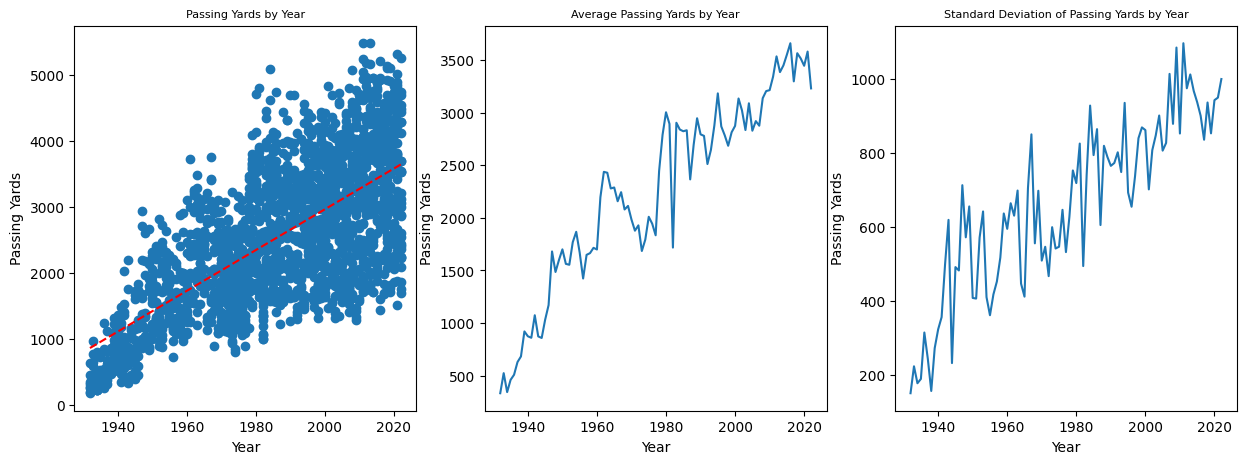

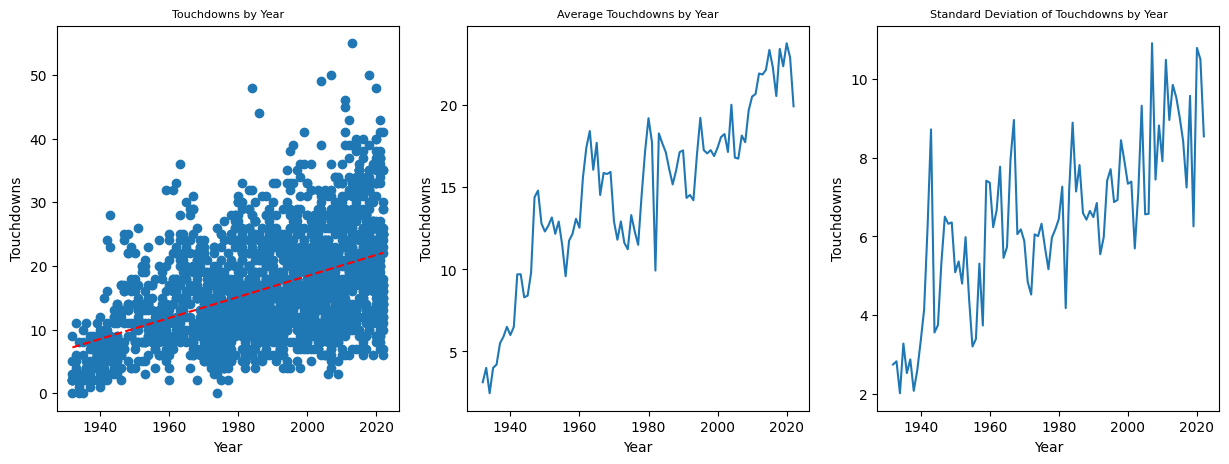

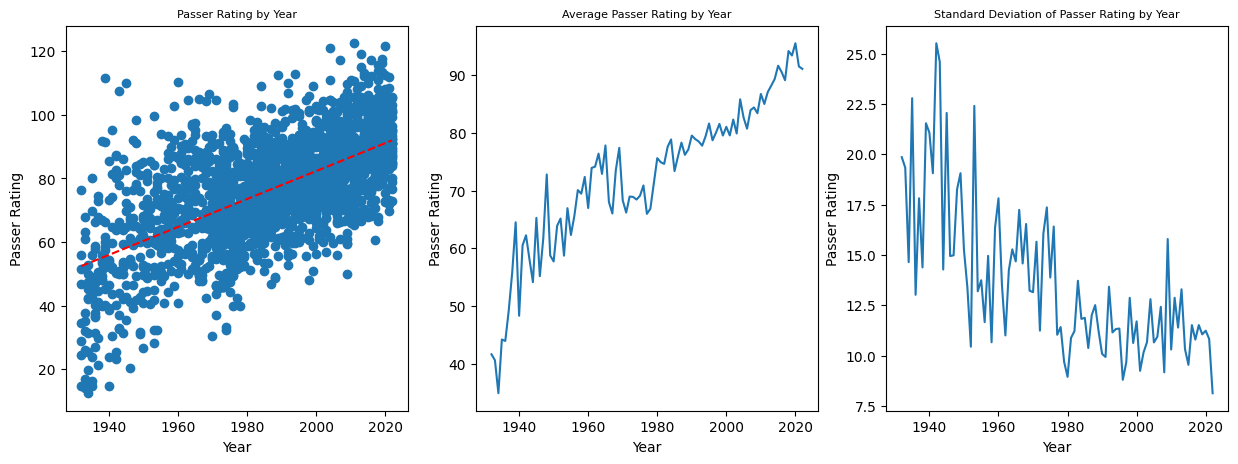

In [77]:
make_plots(df_passing, df_passing['year'], df_passing['Yds'], 'Year', 'Passing Yards', 'year', 'Yds')
make_plots(df_passing, df_passing['year'], df_passing['TD'], 'Year', 'Touchdowns', 'year', 'TD')
make_plots(df_passing, df_passing['year'], df_passing['Rate'], 'Year', 'Passer Rating', 'year', 'Rate')

Let's look at quarterback rushing statistics. It appears that early on (1930s, 1940s), quarterbacks were more inclined to run. Then in the middle (1960s to 1980s) the traditional "pocket passer" was the norm. Recently it appears that the running quarterback is now becoming a more popular option again. This seems to be intriguing, we'll keep this in mind. 

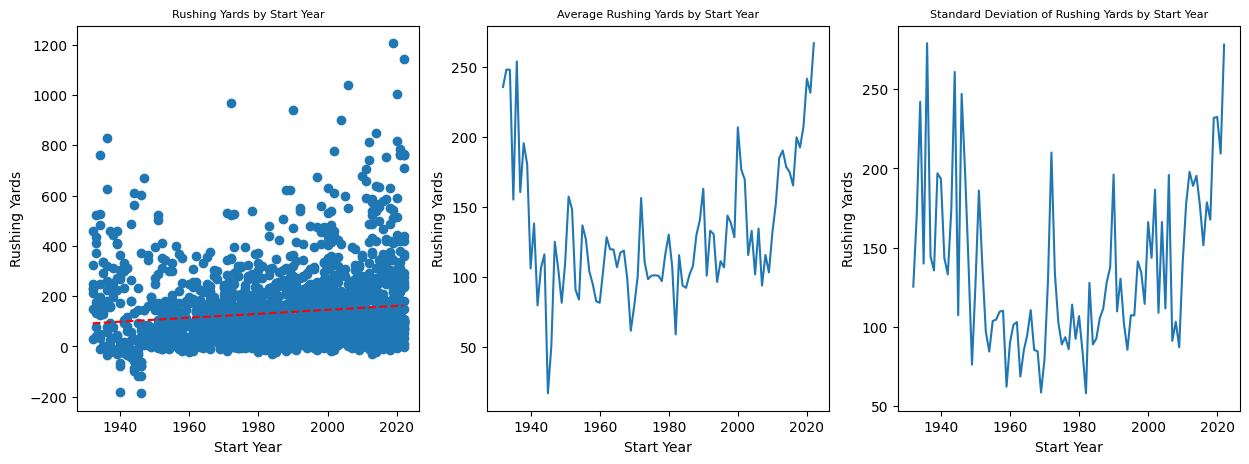

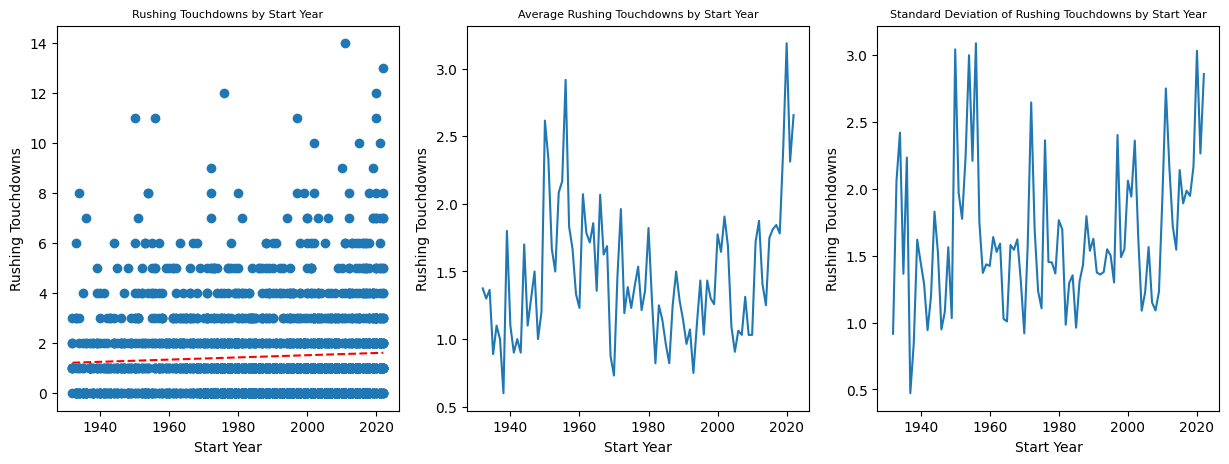

In [78]:
make_plots(df_rushing, df_rushing['year'], df_rushing['Rush_Yds'], 'Start Year', 'Rushing Yards', 'year', 'Rush_Yds')
make_plots(df_rushing, df_rushing['year'], df_rushing['Rush_TD'], 'Start Year', 'Rushing Touchdowns', 'year', 'Rush_TD')

Now let's analyze some statistics with weaker correlations. Down below, it seems that quarterbacks are becoming more careful with the ball and are throwing less interceptions over time, however it's not as obvious as with the trends above. Same thing with sacks. It appears that quarterbacks are being sacked more now then before as it becomes more of a passing league, however there's no sign of increased precision as the standard deviation seems chaotic without a clear direction.

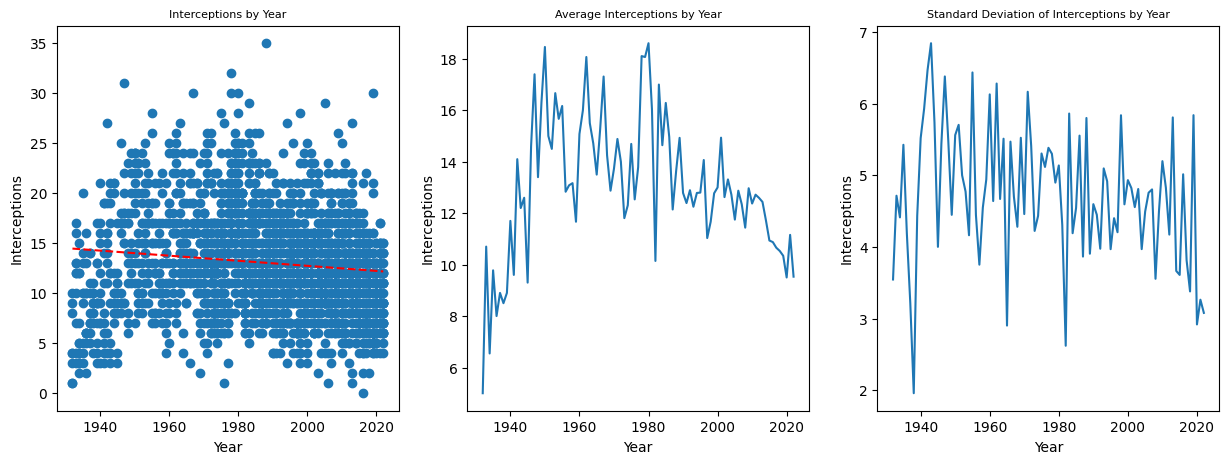

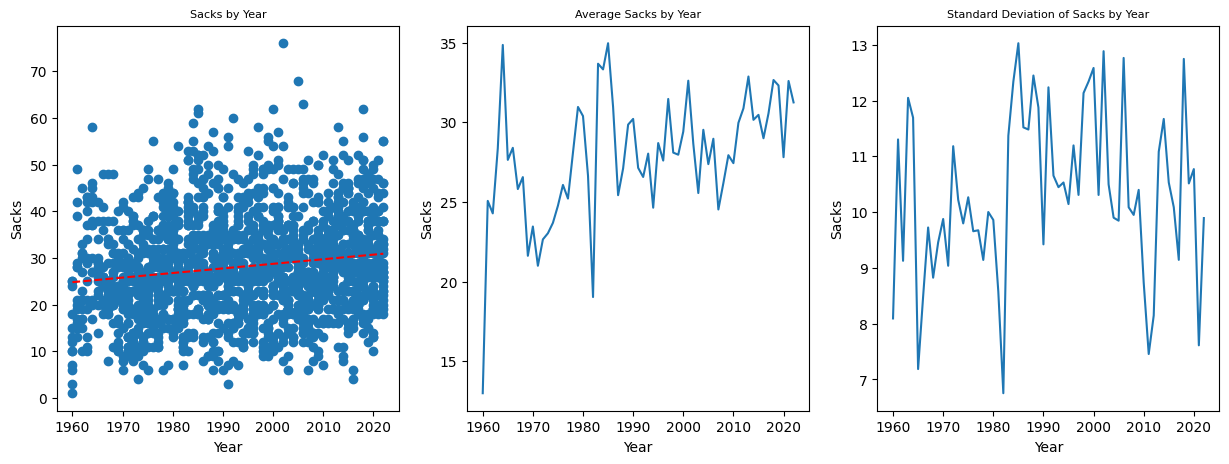

In [79]:
make_plots(df_passing, df_passing['year'], df_passing['Int'], 'Year', 'Interceptions', 'year', 'Int')
df_temp = df_passing[df_passing['year'] >= 1960]
make_plots(df_temp, df_temp['year'], df_temp['Sk'], 'Year', 'Sacks', 'year', 'Sk')

Additionally, ratio statistics seem to display a stronger clustering of data as year increases, as seen by the shrinkage of the standard deviation. In all these cases (Cmp%, TD%, Int%, Sk%), standard deviation decreases over time, and three of the four statistics seem to indicate quarterbacks are improving as year increases. As year increases, quarterbacks seem to on average complete a higher percent of passes, have a lower interception percentage, and are seeming to be sacked less on a per attempt basis. The only metric that works against quarterback improvement here is a lower touchdown percentage. This may be because quarterbacks simply throw the ball more in todays game, whereas in the past passing might've been seen more as a big play, all-or-nothing move. 

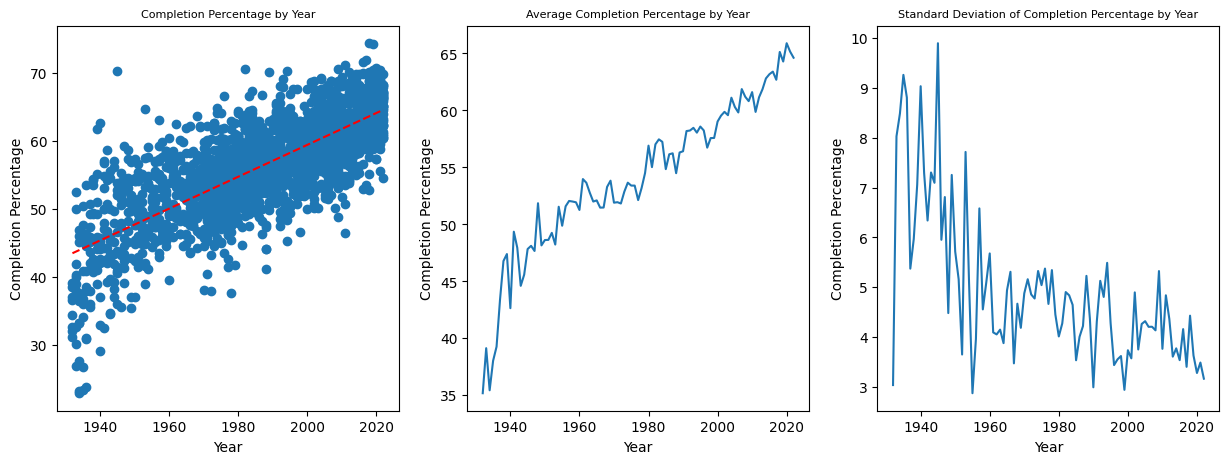

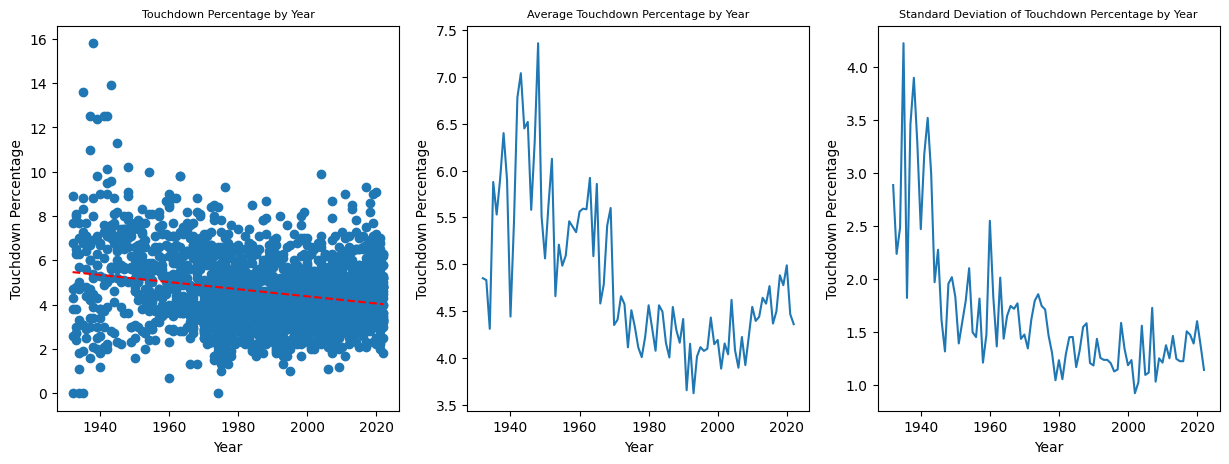

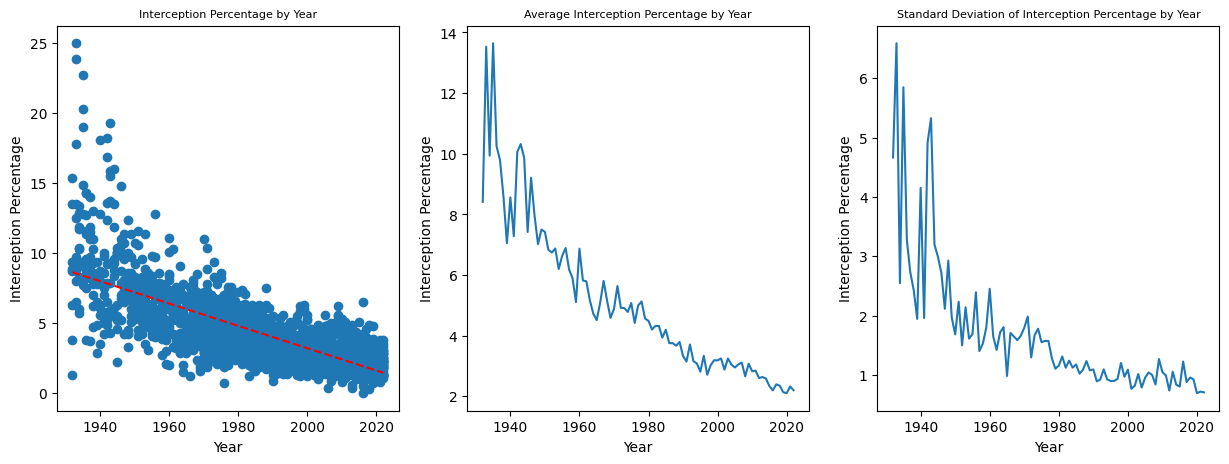

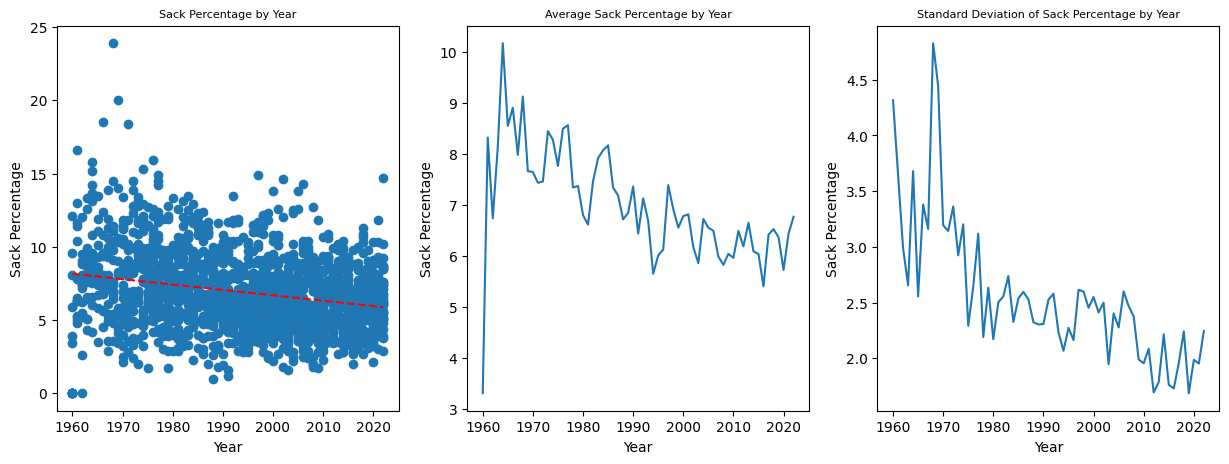

In [80]:
make_plots(df_passing, df_passing['year'], df_passing['Cmp%'], 'Year', 'Completion Percentage', 'year', 'Cmp%')
make_plots(df_passing, df_passing['year'], df_passing['TD%'], 'Year', 'Touchdown Percentage', 'year', 'TD%')
make_plots(df_passing, df_passing['year'], df_passing['Int%'], 'Year', 'Interception Percentage', 'year', 'Int%')
df_temp = df_passing[df_passing['year'] >= 1960]
make_plots(df_temp, df_temp['year'], df_temp['Sk%'], 'Year', 'Sack Percentage', 'year', 'Sk%')

Studying some advanced passing statistics additionally yields some interesting results. Standard deviation seems to get smaller over time in every advanced metric except for Yards per Game. Overall, it seems that the yards per game and advanced attempts metrics (Y/G, 'AY/A', 'NY/A') seem to have a positive relationship with year. However, Yards per Completion doesn't have a definitive trend line, and yards per attempt also seem to decrease over time, bolstering my viewpoint that the passing play was seen as a more special occasion play early on.

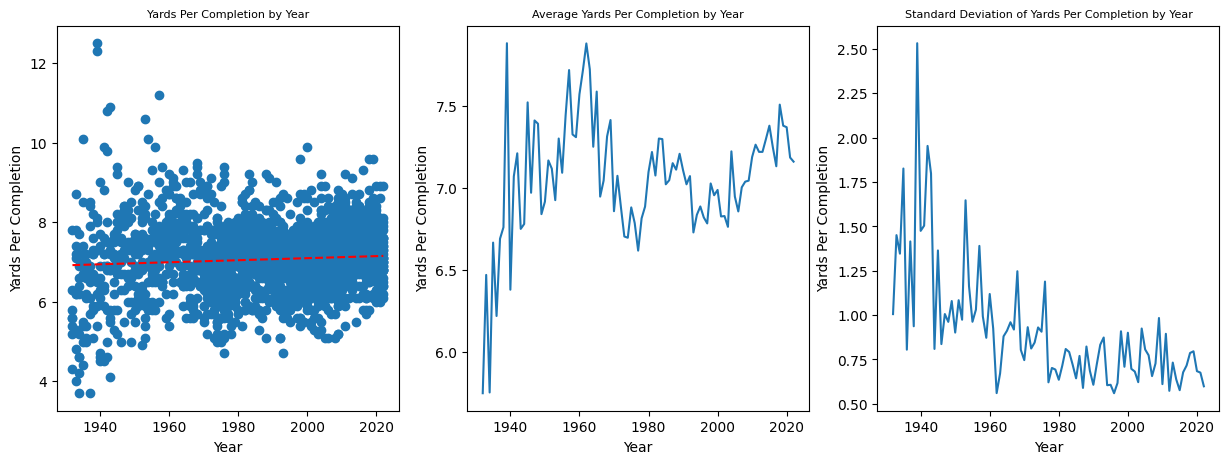

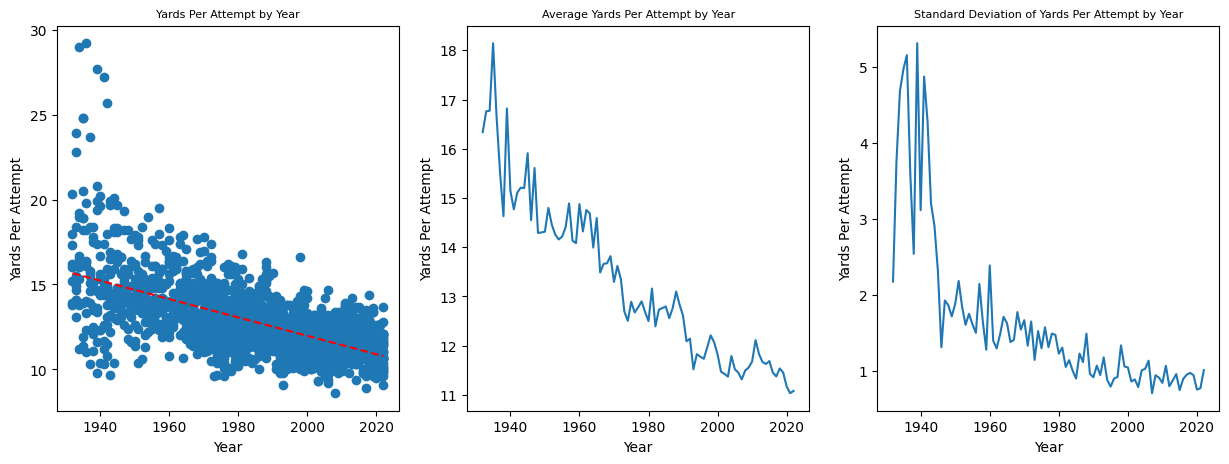

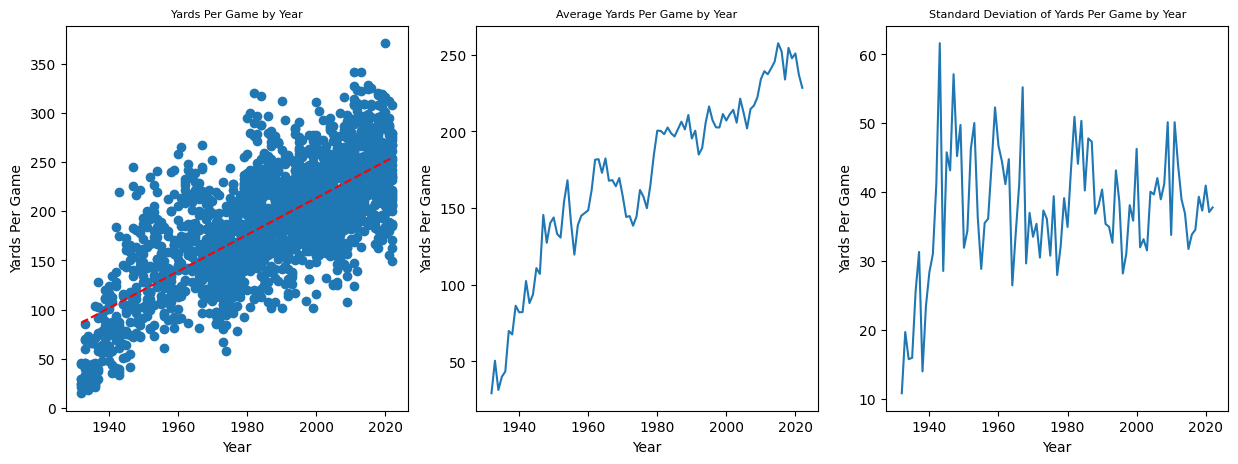

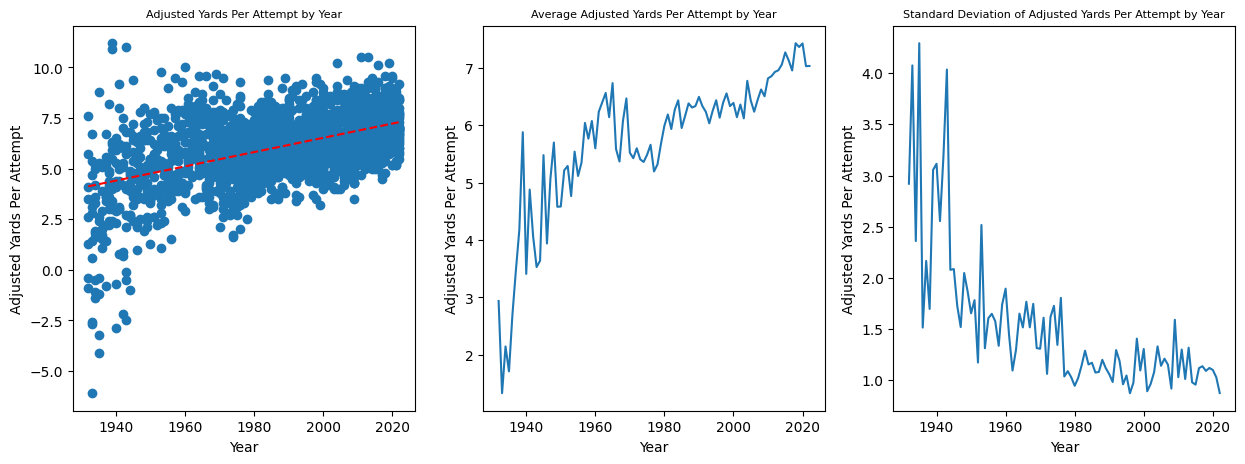

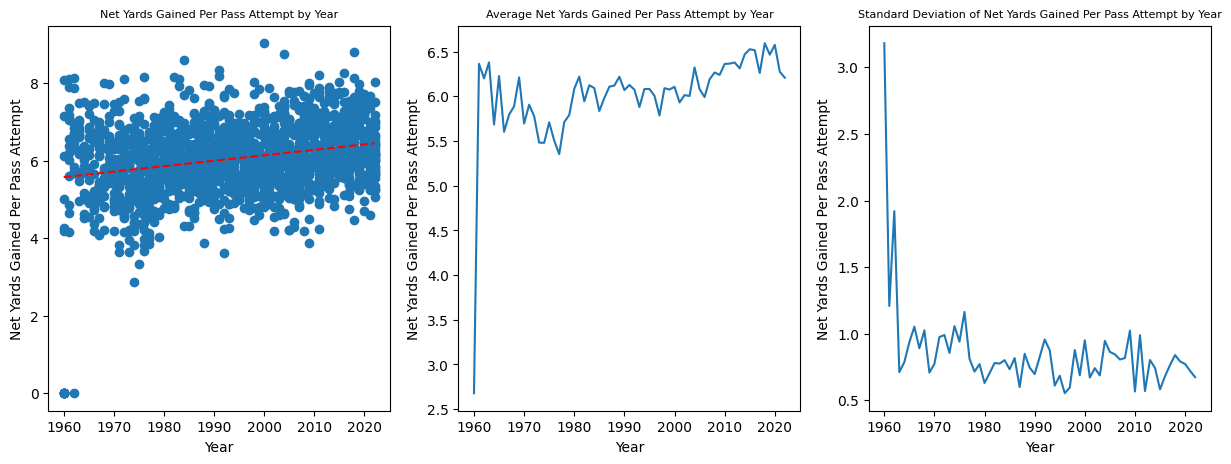

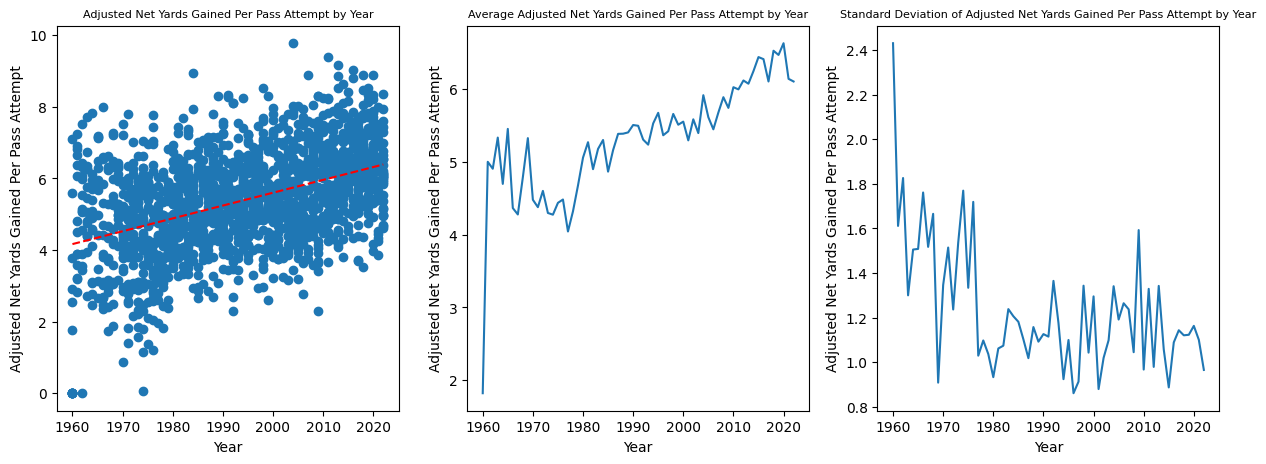

In [81]:
make_plots(df_passing, df_passing['year'], df_passing['Y/A'], 'Year', 'Yards Per Completion', 'year', 'Y/A')
make_plots(df_passing, df_passing['year'], df_passing['Y/C'], 'Year', 'Yards Per Attempt', 'year', 'Y/C')
make_plots(df_passing, df_passing['year'], df_passing['Y/G'], 'Year', 'Yards Per Game', 'year', 'Y/G')
make_plots(df_passing, df_passing['year'], df_passing['AY/A'], 'Year', 'Adjusted Yards Per Attempt', 'year', 'AY/A')
df_temp = df_passing[df_passing['year'] >= 1960]
make_plots(df_temp, df_temp['year'], df_temp['NY/A'], 'Year', 'Net Yards Gained Per Pass Attempt', 'year', 'NY/A')
make_plots(df_temp, df_temp['year'], df_temp['ANY/A'], 'Year', 'Adjusted Net Yards Gained Per Pass Attempt', 'year', 'ANY/A')

Now lets take some of the variables from the plot above that showed the strongest correlation to year and analyze quarterback career statistics for those variables. We will do this by comparing quarterbacks across different decades, via box plots and bar graphs. Regarding the box plots, we can see that players that start in earlier decades are going to have less career passing yards then players starting in post-1970. Once 1970 comes, the inner quartile range remains about the same until 2000, with the median not changing much. However, the presense of outliers grows as we increase the decade. This might mean that we have more "great" quartersback as time goes on, yet the average quarterback remains the same in skill. For the decades, we only go up to the 2000s as most of the quarterbacks from that era have now retired or are out of their prime. However, the same cannot be said about the 2010s, so we exclude that era as not enough time has went by to suggest the career numbers are accurate.

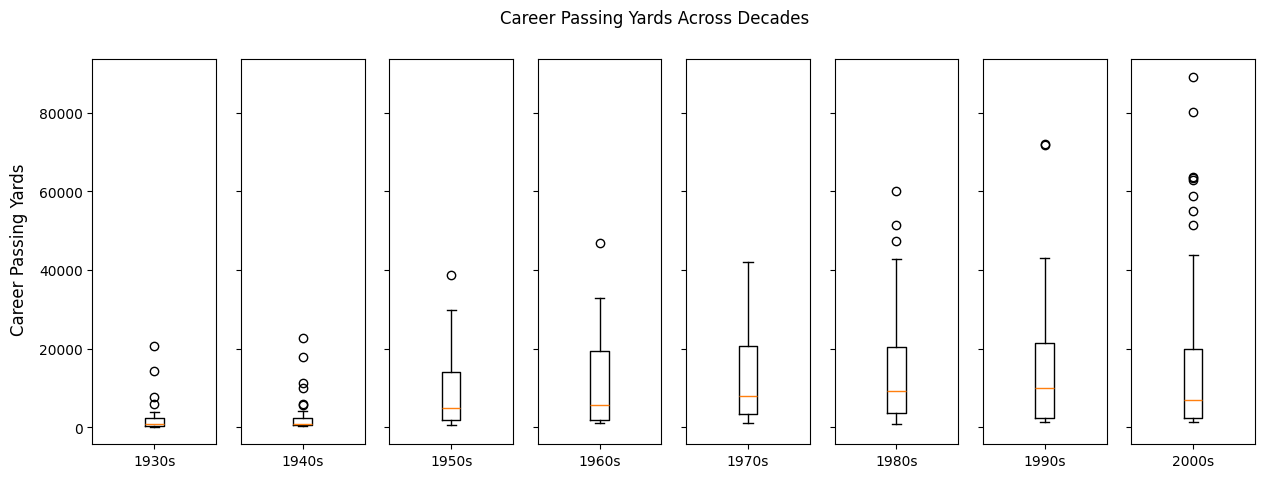

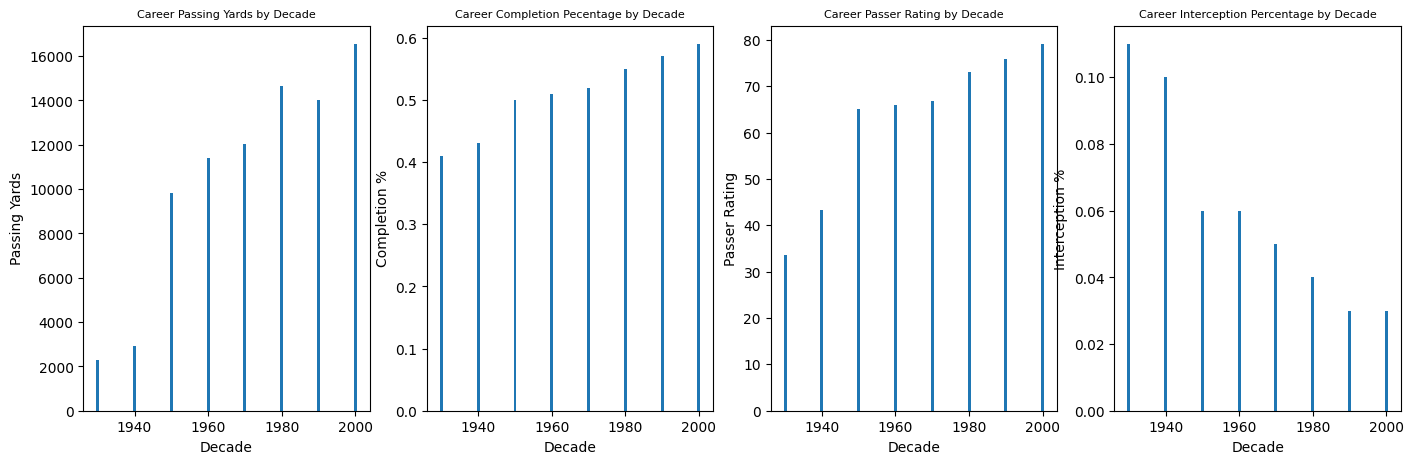

In [82]:
# Create 8 Box Plots for Career Passing Yards, 1 per Decade
fig, axs = plt.subplots(1, 8, figsize=(15, 5), sharey=True)
fig.suptitle('Career Passing Yards Across Decades')
fig.text(0.07, 0.5, 'Career Passing Yards', va='center', rotation='vertical', fontsize=12)
axs[0].boxplot(df_1930s['Yds'])
axs[0].set_xticklabels(['1930s'])
axs[1].boxplot(df_1940s['Yds'])
axs[1].set_xticklabels(['1940s'])
axs[2].boxplot(df_1950s['Yds'])
axs[2].set_xticklabels(['1950s'])
axs[3].boxplot(df_1960s['Yds'])
axs[3].set_xticklabels(['1960s'])
axs[4].boxplot(df_1970s['Yds'])
axs[4].set_xticklabels(['1970s'])
axs[5].boxplot(df_1980s['Yds'])
axs[5].set_xticklabels(['1980s'])
axs[6].boxplot(df_1990s['Yds'])
axs[6].set_xticklabels(['1990s'])
axs[7].boxplot(df_2000s['Yds'])
axs[7].set_xticklabels(['2000s'])
plt.show()

# Create 4 Bar Graphs for Promising Statistics identified above
df_decade = df_decade[df_decade['year'] < 2010]

fig, axs = plt.subplots(1, 4, figsize=(17, 5))
axs[0].bar(df_decade['year'], df_decade['Yds'])
axs[0].set_title("Career Passing Yards by Decade", fontsize=8)
axs[0].set_xlabel('Decade')
axs[0].set_ylabel('Passing Yards')

axs[1].bar(df_decade['year'], df_decade['Cmp%'])
axs[1].set_title("Career Completion Pecentage by Decade", fontsize=8)
axs[1].set_xlabel('Decade')
axs[1].set_ylabel('Completion %')

axs[2].bar(df_decade['year'], df_decade['Rate'])
axs[2].set_title("Career Passer Rating by Decade", fontsize=8)
axs[2].set_xlabel('Decade')
axs[2].set_ylabel('Passer Rating')

axs[3].bar(df_decade['year'], df_decade['Int%'])
axs[3].set_title("Career Interception Percentage by Decade", fontsize=8)
axs[3].set_xlabel('Decade')
axs[3].set_ylabel('Interception %')
plt.show()

In [83]:
players.to_csv('players.csv')